In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
g = {0: {1, 2, 3},
         1: {0, 3},
         2: {3, 7},
         3: {0, 1, 2},
         4: {6, 8, 9},
         5: {3, 6},
   6: {4, 5},
   7: {2},
   8: {4, 9},
   9: {4, 8},
   }


In [3]:
G = nx.Graph(g)

### Get the shortest path from one node to another in NetworkX
using `nx.shortest_path(G, node1, node2)`

In [4]:
nx.shortest_path(G,0, 9)

[0, 3, 5, 6, 4, 9]

### Get the shortest path length from one node to another in NetworkX
using `nx.shortest_path_length(G,node1, node2)`

In [5]:
nx.shortest_path_length(G,0, 9)

5

### Get the BFS tree of a node
use `nx.bfs_tree(G, node)`,
draw the tree

In [6]:
t0 = nx.bfs_tree(G, 0)

In [7]:
t0.edges()

OutEdgeView([(0, 1), (0, 2), (0, 3), (2, 7), (3, 5), (5, 6), (6, 4), (4, 8), (4, 9)])

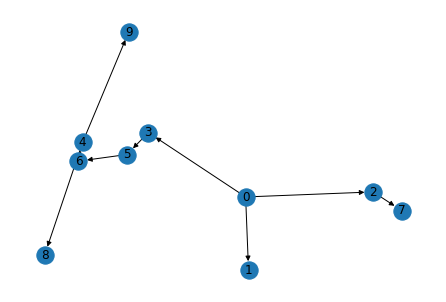

In [9]:
nx.draw(t0, with_labels=True)

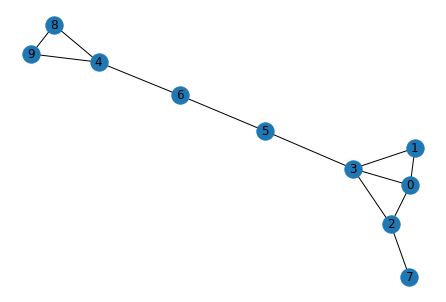

In [10]:
nx.draw(G, with_labels=True)

### Get the shortest path length from one node to all other nodes
use `nx.shortest_path_length(G,node)`

In [11]:
nx.shortest_path_length(G,0)

{0: 0, 1: 1, 2: 1, 3: 1, 7: 2, 5: 2, 6: 3, 4: 4, 8: 5, 9: 5}

# Lets use real data from Open Street Map
https://osmnx.readthedocs.io/en/stable/ <br/>
https://github.com/gboeing/osmnx

In [12]:
import osmnx as ox

use `ox.graph_from_place('Jerusalem, Israel', network_type='drive')`
look at osmnx documentation to experiment with different network types
use `ox.plot_graph(G)` to plot the network

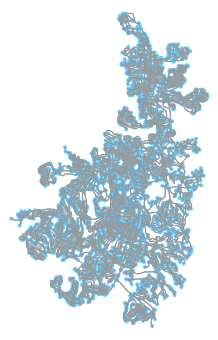

(<Figure size 318.446x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7febbf4006d8>)

In [13]:
G = ox.graph_from_place('Jerusalem, Israel', network_type='drive')
ox.plot_graph(G)

get the basic stats using `ox.basic_stats(G)`

In [14]:
basic_stats = ox.basic_stats(G)

In [15]:
basic_stats

{'n': 6572,
 'm': 13337,
 'k_avg': 4.058734023128424,
 'intersection_count': 5433,
 'streets_per_node_avg': 2.8032562385879487,
 'streets_per_node_counts': {0: 0,
  1: 1139,
  2: 67,
  3: 4367,
  4: 951,
  5: 43,
  6: 5},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.17331101643335362,
  2: 0.010194765672550213,
  3: 0.6644856968959221,
  4: 0.1447048082775411,
  5: 0.0065429093122337184,
  6: 0.0007608034083992696},
 'edge_length_total': 1550324.1729999925,
 'edge_length_avg': 116.24234632975876,
 'street_length_total': 983031.2129999994,
 'street_length_avg': 107.32953521126754,
 'street_segments_count': 9159,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.1116558507322083,
 'self_loop_proportion': 0.003748969033515783,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

### lets create geopandas geodataframes for the nodes and edges in the network:
use `nodes, edges = ox.save_load.graph_to_gdfs(G)`

and also save to shapefile using `ox.save_graph_shapefile(G, filename='jer_network')`
    

In [16]:
nodes, edges = ox.save_load.graph_to_gdfs(G)

In [20]:
ox.save_graph_shapefile(G, folder = '../data/', filename='jer_network')

What is the network's coordinate system?
### Lets project the network to utm 
using 
`G_projected = ox.project_graph(G)`

In [18]:
G_projected = ox.project_graph(G)

### Select two nodes in the network and calculate the shortest path between them  
use `route = nx.shortest_path(G, node1,node2 )`<br/>
and plot: `fig, ax = ox.plot_graph_route(G, route)`

if you have a location coordinate and want to use it instead you can use `ox.get_nearest_node(G, (lat, lon))`
to get the node closest to the location

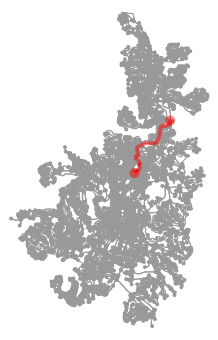

In [19]:
route = nx.shortest_path(G, 1129611276,2935652342 )
fig, ax = ox.plot_graph_route(G, route)